## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [185]:
import pandas as pd
import numpy as np
st=pd.read_csv('C:/Users/Faisal/R3_Residency/R3_Lab_External/students-data.csv',delimiter=';')

In [128]:
st.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [186]:
st.index.name='number'
print (st.index.name)
print(st.head())
print (st.tail())

number
       school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
number                                                                          
0          GP   F   18       U     GT3       A     4     4  at_home   teacher   
1          GP   F   17       U     GT3       T     1     1  at_home     other   
2          GP   F   15       U     LE3       T     1     1  at_home     other   
3          GP   F   15       U     GT3       T     4     2   health  services   
4          GP   F   16       U     GT3       T     3     3    other     other   

        ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
number  ...                                                                 
0       ...      4        3      4     1     1      3        6   5   6   6  
1       ...      5        3      3     1     1      3        4   5   5   6  
2       ...      4        3      2     2     3      3       10   7   8  10  
3       ...      3        2      2     1

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [187]:
print(st.dtypes)
st.select_dtypes(exclude=['int64','float64']).head()

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [188]:
st.select_dtypes(include=['int64','float64']).var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [189]:
st.drop('traveltime',axis=1,inplace=True)
st.drop('studytime',axis=1,inplace=True)
st.drop('failures',axis=1,inplace=True)
st.drop('famrel',axis=1,inplace=True)
st.drop('freetime',axis=1,inplace=True)
st.drop('Dalc',axis=1,inplace=True)
print(st)

       school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
number                                                                 
0          GP   F   18       U     GT3       A     4     4   at_home   
1          GP   F   17       U     GT3       T     1     1   at_home   
2          GP   F   15       U     LE3       T     1     1   at_home   
3          GP   F   15       U     GT3       T     4     2    health   
4          GP   F   16       U     GT3       T     3     3     other   
5          GP   M   16       U     LE3       T     4     3  services   
6          GP   M   16       U     LE3       T     2     2     other   
7          GP   F   17       U     GT3       A     4     4     other   
8          GP   M   15       U     LE3       A     3     2  services   
9          GP   M   15       U     GT3       T     3     4     other   
10         GP   F   15       U     GT3       T     4     4   teacher   
11         GP   F   15       U     GT3       T     2     1  serv

In [190]:
st.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
goout          int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [191]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_col=['school','sex','address','famsize','Pstatus','Mjob','Fjob','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
st[cat_col]=st[cat_col].apply(lambda col : le.fit_transform(col))
print (st[cat_col].head())

        school  sex  address  famsize  Pstatus  Mjob  Fjob  guardian  \
number                                                                 
0            0    0        1        0        0     0     4         1   
1            0    0        1        0        1     0     2         0   
2            0    0        1        1        1     0     2         1   
3            0    0        1        0        1     1     3         1   
4            0    0        1        0        1     2     2         0   

        schoolsup  famsup  paid  activities  nursery  higher  internet  \
number                                                                   
0               1       0     0           0        1       1         0   
1               0       1     0           0        0       1         1   
2               1       0     1           0        1       1         1   
3               0       1     1           1        1       1         1   
4               0       1     1           0        

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [192]:
st['G1']=np.where(st['G1']>=10,1,0)
st['G2']=np.where(st['G2']>=10,1,0)
st['G3']=np.where(st['G3']>=10,1,0)
st.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [193]:
st.drop('reason',axis=1,inplace=True)
X=st.drop('G3',axis=1)
y=st['G3']
print('X')
print(X.head(2))
print('y')
print(y.head(2))
X.dtypes

X
        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   

        ...  nursery  higher  internet  romantic  goout  Walc  health  \
number  ...                                                             
0       ...        1       1         0         0      4     1       3   
1       ...        0       1         1         0      3     1       3   

        absences  G1  G2  
number                    
0              6   0   0  
1              4   0   0  

[2 rows x 25 columns]
y
number
0    0
1    0
Name: G3, dtype: int32


school        int32
sex           int32
age           int64
address       int32
famsize       int32
Pstatus       int32
Medu          int64
Fedu          int64
Mjob          int32
Fjob          int32
guardian      int32
schoolsup     int32
famsup        int32
paid          int32
activities    int32
nursery       int32
higher        int32
internet      int32
romantic      int32
goout         int64
Walc          int64
health        int64
absences      int64
G1            int32
G2            int32
dtype: object

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

Text(0, 0.5, 'G3')

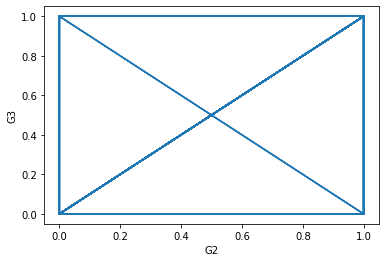

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(st['G2'],st['G3'])
plt.xlabel('G2')
plt.ylabel('G3')


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

Number of Students in school GP "0" and MS "1"
0    349
1     46
Name: school, dtype: int64


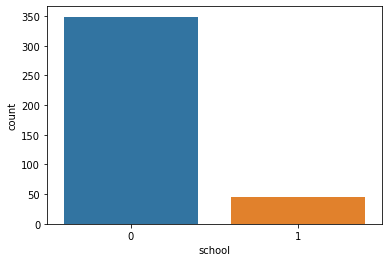

In [195]:
print('Number of Students in school GP "0" and MS "1"')
print (st['school'].value_counts())
sns.countplot(data=st,x='school')

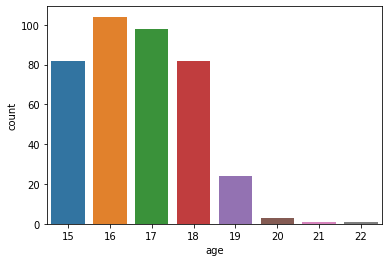

In [196]:
sns.countplot(data=st,x='age')

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.24,random_state=1)
print("x_train")
print(x_train.count())
print("x_test")
print(x_test.count())
print("y_Train")
print(y_train.count())
print("y_Test")
print(y_test.count())

x_train
school        300
sex           300
age           300
address       300
famsize       300
Pstatus       300
Medu          300
Fedu          300
Mjob          300
Fjob          300
guardian      300
schoolsup     300
famsup        300
paid          300
activities    300
nursery       300
higher        300
internet      300
romantic      300
goout         300
Walc          300
health        300
absences      300
G1            300
G2            300
dtype: int64
x_test
school        95
sex           95
age           95
address       95
famsize       95
Pstatus       95
Medu          95
Fedu          95
Mjob          95
Fjob          95
guardian      95
schoolsup     95
famsup        95
paid          95
activities    95
nursery       95
higher        95
internet      95
romantic      95
goout         95
Walc          95
health        95
absences      95
G1            95
G2            95
dtype: int64
y_Train
300
y_Test
95


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)
model = LogisticRegression()
model.fit(x_train_scaled, y_train)
y_predict = model.predict(x_test_scaled)
model_score = model.score(x_test_scaled, y_test)
print(model_score)

0.9052631578947369


C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [208]:
from sklearn.metrics import f1_score,classification_report, confusion_matrix
print(f1_score(y_predict,y_test))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))


0.931297709923664
[[25  3]
 [ 6 61]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.95      0.91      0.93        67

    accuracy                           0.91        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95



# Naive bayes with Iris data

### Import Iris.csv

In [209]:
iris=pd.read_csv('C:/Users/Faisal/R3_Residency/R3_Lab_External/Iris.csv')

In [210]:
iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [215]:
iris.isnull().sum()
x_Set=iris.drop('Class',axis=1)
y_Set=iris['Class']
print("Feature_Set")
print(x_Set.head(2))
print("Target_Set")
print(y_Set.head(2))

Feature_Set
   Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                   5.1                  3.5                   1.4   
1                   4.9                  3.0                   1.4   

   Petal width (in cm)  
0                  0.2  
1                  0.2  
Target_Set
0    0
1    0
Name: Class, dtype: int32


In [214]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
iris['Class']=le.fit_transform(iris['Class'])
print (iris.sample(10))

     Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
76                    6.8                  2.8                   4.8   
107                   7.3                  2.9                   6.3   
143                   6.8                  3.2                   5.9   
28                    5.2                  3.4                   1.4   
77                    6.7                  3.0                   5.0   
117                   7.7                  3.8                   6.7   
126                   6.2                  2.8                   4.8   
41                    4.5                  2.3                   1.3   
123                   6.3                  2.7                   4.9   
129                   7.2                  3.0                   5.8   

     Petal width (in cm)  Class  
76                   1.4      1  
107                  1.8      2  
143                  2.3      2  
28                   0.2      0  
77                   1.7      1  
117

### Find the distribution of target variable (Class)

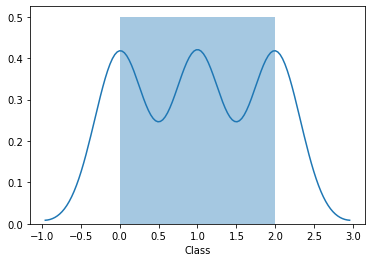

In [217]:
sns.distplot(iris['Class'],kde=True)

### Plot the distribution of target variable using histogram

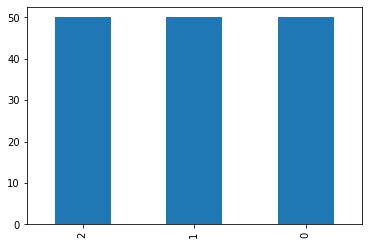

In [218]:
pd.value_counts(iris["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\Faisal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Faisal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


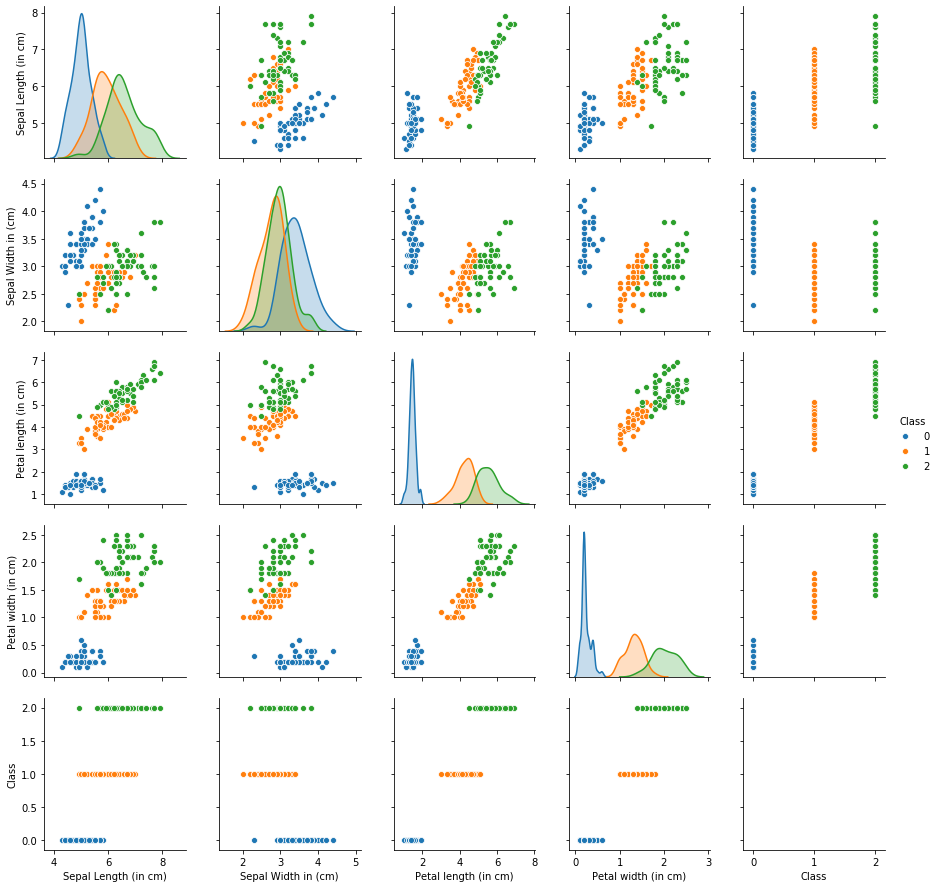

In [221]:
sns.pairplot(iris,hue='Class')

### Summary Statistics and explain insights for at least 2 variables

### Correlation among all variables and give your insights

### Split data in Training and Validation in 80:20

### Do Feature Scaling

### Train and Fit NaiveBayes Model

### Print Accuracy and Confusion Matrix and Conclude your findings